In [1]:
import numpy as np
import pandas as pd
import re

In [2]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('final_cleaned_v1.csv')

In [4]:
df.head(1)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features
0,flat,shree vardhman victoria,sector 70,1.55,7948.0,1950.0,Super Built up area 1950(181.16 sq.m.)Carpet area: 1161 sq.ft. (107.86 sq.m.),3,3,3,"pooja room,study room,servant room,others",6.0,South-East,1 to 5 Year Old,"['Airia Mall', 'Golf Course Extn Road', 'Sohna Road', 'Southern Peripheral Rd, Gurugram', 'Kunskapsskolan International', 'Ektaa Hospitals Main Sohna Rd', 'Sanjeevani Hospital - Child Specialist', 'Federal Bank Sector 71', 'Central Bank Of India Sohna Rd', 'Axis Bank, Sohna Rd', 'Spaze Palazo, Golf Course Ext Rd', 'VATIKA BUSINESS PARK Sohna Rd', 'The Medicity, Spaze iTech Park', 'Tulip Violet Society, Sector 69', 'IndianOil, Hasanpur']","['1 Fan', '3 Geyser', '1 Microwave', '1 Light', '1 Chimney', '1 AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Modular Kitchen', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']"


In [5]:
df.duplicated().sum()

121

## 1. areaWithType

In [6]:
df.sample(5)[['price','area','areaWithType']]

,price,area,areaWithType
2683,2.20,1760.0,Carpet area: 1760 (163.51 sq.m.)
3621,0.65,1441.0,Super Built up area 1440.45(133.82 sq.m.)
36,2.70,2705.0,Super Built up area 2605(242.01 sq.m.)
1862,1.78,2215.0,Super Built up area 2215(205.78 sq.m.)Built Up area: 2000 sq.ft. (185.81 sq.m.)Carpet area: 1650 sq.ft. (153.29 sq.m.)
2140,1.10,1800.0,Super Built up area 1800(167.23 sq.m.)Built Up area: 1700 sq.ft. (157.94 sq.m.)Carpet area: 1600 sq.ft. (148.64 sq.m.)


In [7]:
# This function extracts the Super Built up area
def get_super_built_up_area(text):
    match = re.search(r'Super Built up area (\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [8]:
# This function extracts the Built Up area or Carpet area
def get_area(text, area_type):
    match = re.search(area_type + r'\s*:\s*(\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [9]:
# This function checks if the area is provided in sq.m. and converts it to sqft if needed
def convert_to_sqft(text, area_value):
    if area_value is None:
        return None
    match = re.search(r'{} \((\d+\.?\d*) sq.m.\)'.format(area_value), text)
    if match:
        sq_m_value = float(match.group(1))
        return sq_m_value * 10.7639  # conversion factor from sq.m. to sqft
    return area_value

In [10]:
# Extract Super Built up area and convert to sqft if needed
df['super_built_up_area'] = df['areaWithType'].apply(get_super_built_up_area)
df['super_built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['super_built_up_area']), axis=1)

# Extract Built Up area and convert to sqft if needed
df['built_up_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Built Up area'))
df['built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['built_up_area']), axis=1)

# Extract Carpet area and convert to sqft if needed
df['carpet_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Carpet area'))
df['carpet_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['carpet_area']), axis=1)

In [11]:
df[['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].sample(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
2403,4.21,flat,3557.0,Super Built up area 3557(330.46 sq.m.),3557.0,NaN,NaN
3384,0.80,flat,1342.0,Super Built up area 1342(124.68 sq.m.)Carpet area: 1000 sq.ft. (92.9 sq.m.),1342.0,NaN,1000.00
3315,1.93,flat,2262.0,Super Built up area 2262(210.15 sq.m.),2262.0,NaN,NaN
1016,2.05,flat,2600.0,Built Up area: 2600 (241.55 sq.m.)Carpet area: 2400 sq.ft. (222.97 sq.m.),NaN,2600.0,2400.00
453,1.31,flat,820.0,Carpet area: 76.44,NaN,NaN,76.44


In [12]:
df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].shape

(534, 7)

In [13]:
df[df['areaWithType'].str.contains('Plot')][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].head(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
9,17.00,house,4842.0,Plot area 4842(449.84 sq.m.)Built Up area: 9000 sq.ft. (836.13 sq.m.),NaN,9000.0,NaN
15,9.55,house,4950.0,Plot area 550(459.87 sq.m.),NaN,NaN,NaN
18,4.70,house,2368.0,Plot area 220Built Up area: 170 sq.m.Carpet area: 160 sq.m.,NaN,170.0,160.0
26,2.68,house,1557.0,Plot area 173(144.65 sq.m.),NaN,NaN,NaN
35,6.00,house,2430.0,Plot area 270(225.75 sq.m.),NaN,NaN,NaN


In [14]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 19
facing                 1099
agePossession             1
nearbyLocations         176
furnishDetails          976
features                631
super_built_up_area    1870
built_up_area          2603
carpet_area            1844
dtype: int64

In [15]:
all_nan_df = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']]

In [16]:
all_nan_df.head()

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
15,9.55,house,4950.0,Plot area 550(459.87 sq.m.),NaN,NaN,NaN
26,2.68,house,1557.0,Plot area 173(144.65 sq.m.),NaN,NaN,NaN
35,6.00,house,2430.0,Plot area 270(225.75 sq.m.),NaN,NaN,NaN
39,0.90,house,900.0,Plot area 100(83.61 sq.m.),NaN,NaN,NaN
42,3.40,house,2250.0,Plot area 250(209.03 sq.m.),NaN,NaN,NaN


In [17]:
# Function to extract plot area from 'areaWithType' column
def extract_plot_area(area_with_type):
    match = re.search(r'Plot area (\d+\.?\d*)', area_with_type)
    return float(match.group(1)) if match else None

In [18]:
all_nan_df['built_up_area'] = all_nan_df['areaWithType'].apply(extract_plot_area)

In [19]:
def convert_scale(row):
    if np.isnan(row['area']) or np.isnan(row['built_up_area']):
        return row['built_up_area']
    else:
        if round(row['area']/row['built_up_area']) == 9.0:
            return row['built_up_area'] * 9
        elif round(row['area']/row['built_up_area']) == 11.0:
            return row['built_up_area'] * 10.7
        else:
            return row['built_up_area']

In [20]:
all_nan_df['built_up_area'] = all_nan_df.apply(convert_scale,axis=1)

In [21]:
# update the original dataframe
df.update(all_nan_df)

In [22]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 19
facing                 1099
agePossession             1
nearbyLocations         176
furnishDetails          976
features                631
super_built_up_area    1870
built_up_area          2069
carpet_area            1844
dtype: int64

## 2.additionalRoom


In [23]:
df['additionalRoom'].value_counts()

not available                                    1580
servant room                                      704
study room                                        249
others                                            225
pooja room                                        165
store room                                         99
study room,servant room                            98
pooja room,servant room                            82
pooja room,study room,servant room,store room      71
servant room,others                                60
pooja room,study room,servant room                 54
pooja room,study room,servant room,others          51
servant room,pooja room                            38
servant room,store room                            31
study room,others                                  29
pooja room,study room                              22
pooja room,others                                  17
pooja room,store room                              15
servant room,study room     

In [24]:
new_cols = ['study room', 'servant room', 'store room', 'pooja room', 'others']

In [25]:
for col in new_cols:
    df[col] = df['additionalRoom'].str.contains(col).astype(int)

In [26]:
df.sample(5)[['additionalRoom','study room', 'servant room', 'store room', 'pooja room', 'others']]

,additionalRoom,study room,servant room,store room,pooja room,others
2491,not available,0,0,0,0,0
3410,not available,0,0,0,0,0
2950,pooja room,0,0,0,1,0
2845,not available,0,0,0,0,0
1128,not available,0,0,0,0,0


In [27]:
df.head(1)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,flat,shree vardhman victoria,sector 70,1.55,7948.0,1950.0,Super Built up area 1950(181.16 sq.m.)Carpet area: 1161 sq.ft. (107.86 sq.m.),3,3,3,"pooja room,study room,servant room,others",6.0,South-East,1 to 5 Year Old,"['Airia Mall', 'Golf Course Extn Road', 'Sohna Road', 'Southern Peripheral Rd, Gurugram', 'Kunskapsskolan International', 'Ektaa Hospitals Main Sohna Rd', 'Sanjeevani Hospital - Child Specialist', 'Federal Bank Sector 71', 'Central Bank Of India Sohna Rd', 'Axis Bank, Sohna Rd', 'Spaze Palazo, Golf Course Ext Rd', 'VATIKA BUSINESS PARK Sohna Rd', 'The Medicity, Spaze iTech Park', 'Tulip Violet Society, Sector 69', 'IndianOil, Hasanpur']","['1 Fan', '3 Geyser', '1 Microwave', '1 Light', '1 Chimney', '1 AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Modular Kitchen', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']",1950.0,NaN,1161.0,1,1,0,1,1


## 3.agePossession

In [28]:
df['agePossession'].value_counts()

1 to 5 Year Old        1669
5 to 10 Year Old        570
0 to 1 Year Old         527
undefined               331
10+ Year Old            309
Under Construction       89
Within 6 months          70
Within 3 months          26
2023-12-01 00:00:00      22
By 2023                  19
By 2024                  17
2024-12-01 00:00:00      16
2024-03-01 00:00:00      14
2024-10-01 00:00:00       8
2024-01-01 00:00:00       8
2024-06-01 00:00:00       7
2025-12-01 00:00:00       7
2023-08-01 00:00:00       7
2023-11-01 00:00:00       5
By 2025                   4
2023-09-01 00:00:00       4
2024-08-01 00:00:00       4
2023-10-01 00:00:00       4
2024-07-01 00:00:00       4
2024-02-01 00:00:00       3
2024-05-01 00:00:00       3
2025-01-01 00:00:00       3
2024-11-01 00:00:00       3
2025-03-01 00:00:00       2
2026-01-01 00:00:00       2
2025-09-01 00:00:00       2
2026-04-01 00:00:00       2
2027-06-01 00:00:00       2
2027-07-01 00:00:00       2
2025-07-01 00:00:00       2
By 2027             

In [29]:
def categorize_age_possession(value):
    if pd.isna(value):
        return "Undefined"
    if "0 to 1 Year Old" in value or "Within 6 months" in value or "Within 3 months" in value:
        return "New Property"
    if "1 to 5 Year Old" in value:
        return "Relatively New"
    if "5 to 10 Year Old" in value:
        return "Moderately Old"
    if "10+ Year Old" in value:
        return "Old Property"
    if "Under Construction" in value or "By" in value:
        return "Under Construction"
    try:
        # For entries like 'May 2024'
        int(value.split(" ")[-1])
        return "Under Construction"
    except:
        return "Undefined"

In [30]:
df['agePossession'] = df['agePossession'].apply(categorize_age_possession)

In [31]:
df['agePossession'].value_counts()

Relatively New        1669
New Property           623
Moderately Old         570
Undefined              483
Old Property           309
Under Construction     131
Name: agePossession, dtype: int64

## 4.furnishDetails

In [32]:
df.sample(5)[['furnishDetails','features']]

,furnishDetails,features
3092,NaN,"['Private Garden / Terrace', 'Water Storage', 'Park', 'Visitor Parking']"
214,"['5 AC', '1 Chimney', '1 Modular Kitchen', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']"
417,NaN,"['Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'Bank Attached Property', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Internet/wi-fi connectivity', 'Low Density Society', 'Shopping Centre', 'Fitness Centre / GYM', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']"
3091,NaN,"['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Water purifier', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Internet/wi-fi connectivity', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center']"
1258,"['2 Wardrobe', '6 Fan', '1 Exhaust Fan', '4 Geyser', '6 Light', '1 Modular Kitchen', '1 Chimney', '1 Curtains', 'No AC', 'No Bed', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Power Back-up', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'No open drainage around', 'Piped-gas', 'Swimming Pool', 'Park', 'Security Personnel', 'Shopping Centre', 'Fitness Centre / GYM', 'Rain Water Harvesting', 'Club house / Community Center']"


In [33]:
df['furnishDetails'].isnull().sum()

976

In [34]:
# Extract all unique furnishings from the furnishDetails column
all_furnishings = []
for detail in df['furnishDetails'].dropna():
    furnishings = detail.replace('[', '').replace(']', '').replace("'", "").split(', ')
    all_furnishings.extend(furnishings)
unique_furnishings = list(set(all_furnishings))

# Define a function to extract the count of a furnishing from the furnishDetails
def get_furnishing_count(details, furnishing):
    if isinstance(details, str):
        if f"No {furnishing}" in details:
            return 0
        pattern = re.compile(f"(\d+) {furnishing}")
        match = pattern.search(details)
        if match:
            return int(match.group(1))
        elif furnishing in details:
            return 1
    return 0

# Simplify the furnishings list by removing "No" prefix and numbers
columns_to_include = [re.sub(r'No |\d+', '', furnishing).strip() for furnishing in unique_furnishings]
columns_to_include = list(set(columns_to_include))  # Get unique furnishings
columns_to_include = [furnishing for furnishing in columns_to_include if furnishing]  # Remove empty strings

# Create new columns for each unique furnishing and populate with counts
for furnishing in columns_to_include:
    df[furnishing] = df['furnishDetails'].apply(lambda x: get_furnishing_count(x, furnishing))

# Create the new dataframe with the required columns
furnishings_df = df[['furnishDetails'] + columns_to_include]

In [35]:
furnishings_df.drop(columns=['furnishDetails'],inplace=True)

<ipython-input-35-e4dadedf8e21>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furnishings_df.drop(columns=['furnishDetails'],inplace=True)


In [36]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [37]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(furnishings_df)

In [38]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(furnishings_df)
    wcss_reduced.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

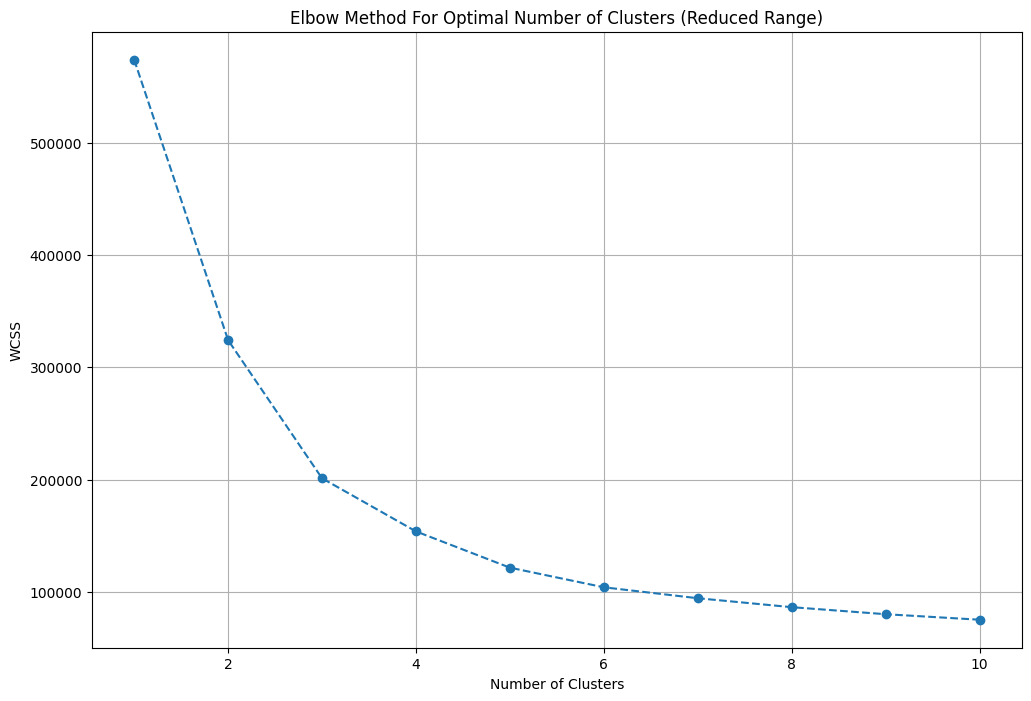

In [39]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [40]:
n_clusters = 3

# Fit the KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_data)

# Predict the cluster assignments for each row
cluster_assignments = kmeans.predict(scaled_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [41]:
df = df.iloc[:,:-18]

In [42]:
df['furnishing_type'] = cluster_assignments

In [43]:
df.sample(5)[['furnishDetails','furnishing_type']]
# 0 -> unfurnished
# 1 -> semifurnished
# 2 -> furnished

,furnishDetails,furnishing_type
1991,[],0
992,"['2 Wardrobe', '2 Bed', '1 Water Purifier', '4 Fan', '1 Exhaust Fan', '1 Geyser', '4 Light', '1 Curtains', '1 Modular Kitchen', 'No AC', 'No Chimney', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine']",1
758,[],0
2347,"['1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",0
567,"['1 Chimney', '3 AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",0


## 5.features

In [44]:
df[['society','features']].sample(5)

,society,features
2976,shree vardhman flora,"['Security / Fire Alarm', 'Power Back-up', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Visitor Parking', 'Swimming Pool', 'Park', 'Low Density Society', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"
1871,independent,"['Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'High Ceiling Height', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Piped-gas', 'Visitor Parking', 'Park', 'Natural Light', 'Internet/wi-fi connectivity', 'Airy Rooms']"
99,emaar mgf the palm drive,"['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']"
2533,tulip violet,"['Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"
2918,ild greens,"['Feng Shui / Vaastu Compliant', 'Lift(s)', 'Maintenance Staff', 'Swimming Pool', 'Park', 'Visitor Parking', 'Security Personnel', 'Fitness Centre / GYM']"


In [45]:
df['features'].isnull().sum()

631

In [46]:
new_df = pd.read_csv('appartments.csv')
new_df.head(2)

,PropertyName,PropertySubName,NearbyLocations,LocationAdvantages,Link,PriceDetails,TopFacilities
0,Smartworld One DXP,"2, 3, 4 BHK Apartment in Sector 113, Gurgaon","['Bajghera Road', 'Palam Vihar Halt', 'DPSG Palam Vihar', 'Park Hospital', 'Gurgaon Railway Station']","{'Bajghera Road': '800 Meter', 'Palam Vihar Halt': '2.5 KM', 'DPSG Palam Vihar': '3.1 KM', 'Park Hospital': '3.1 KM', 'Gurgaon Railway Station': '4.9 KM', 'The NorthCap University': '5.4 KM', 'Dwarka Expy': '1.2 KM', 'Hyatt Place Gurgaon Udyog Vihar': '7.7 KM', 'Dwarka Sector 21, Metro Station': '7.2 KM', 'Pacific D21 Mall': '7.4 KM', 'Indira Gandhi International Airport': '14.7 KM', 'Hamoni Golf Camp': '6.2 KM', 'Fun N Food Waterpark': '8.8 KM', 'Accenture DDC5': '9 KM'}",https://www.99acres.com/smartworld-one-dxp-sector-113-gurgaon-npxid-r400415,"{'2 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,370 sq.ft.', 'price-range': '₹ 2 - 2.4 Cr'}, '3 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,850 - 2,050 sq.ft.', 'price-range': '₹ 2.25 - 3.59 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '2,600 sq.ft.', 'price-range': '₹ 3.24 - 4.56 Cr'}}","['Swimming Pool', 'Salon', 'Restaurant', 'Spa', 'Cafeteria', 'Sun Deck', '24x7 Security', 'Club House', 'Gated Community']"
1,M3M Crown,"3, 4 BHK Apartment in Sector 111, Gurgaon","['DPSG Palam Vihar Gurugram', 'The NorthCap University', 'Park Hospital, Palam Vihar', 'Pacific D21 Mall', 'Palam Vihar Halt Railway Station']","{'DPSG Palam Vihar Gurugram': '1.4 Km', 'The NorthCap University': '4.4 Km', 'Park Hospital, Palam Vihar': '1.4 Km', 'Pacific D21 Mall': '8.2 Km', 'Palam Vihar Halt Railway Station': '1.2 Km', 'Dwarka Sector 21 Metro Station': '8.1 Km', 'Dwarka Expressway': '450 m', 'Fun N Food Water Park': '8.1 Km', 'Indira Gandhi International Airport': '14.1 Km', 'Tau DeviLal Sports Complex': '11.2 Km', 'Hamoni Golf Camp': '5 Km', 'Hyatt Place': '6.1 Km', 'Altrade Business Centre': '11.2 Km'}",https://www.99acres.com/m3m-crown-sector-111-gurgaon-npxid-r404068,"{'3 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '1,605 - 2,170 sq.ft.', 'price-range': '₹ 2.2 - 3.03 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '2,248 - 2,670 sq.ft.', 'price-range': '₹ 3.08 - 3.73 Cr'}}","['Bowling Alley', 'Mini Theatre', 'Manicured Garden', 'Swimming Pool', 'Flower Garden', 'Reading Lounge', 'Golf Course', 'Barbecue', 'Sauna']"


In [47]:
new_df['PropertyName'] = new_df['PropertyName'].str.lower()

In [48]:
new1_df = df[df['features'].isnull()]

In [49]:
new1_df.shape

(631, 26)

In [50]:
x = new1_df.merge(new_df,left_on='society',right_on='PropertyName',how='left')['TopFacilities']

In [51]:
df.loc[new1_df.index,'features'] = x.values

In [52]:
df['features'].isnull().sum()

478

In [53]:
from sklearn.preprocessing import MultiLabelBinarizer
import ast

In [54]:
# Convert the string representation of lists in the 'features' column to actual lists
df['features_list'] = df['features'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) and x.startswith('[') else [])

# Use MultiLabelBinarizer to convert the features list into a binary matrix
mlb = MultiLabelBinarizer()
features_binary_matrix = mlb.fit_transform(df['features_list'])

# Convert the binary matrix into a DataFrame
features_binary_df = pd.DataFrame(features_binary_matrix, columns=mlb.classes_)

In [55]:
features_binary_df.sample(5)

,24/7 Power Backup,24/7 Water Supply,24x7 Security,ATM,Aerobics Centre,Air Hockey,Airy Rooms,Amphitheatre,Automated Car Wash,Badminton Court,Bank Attached Property,Banquet Hall,Bar/Chill-Out Lounge,Barbecue,Basketball Court,Beach Volley Ball Court,Billiards,Bowling Alley,Bus Shelter,Business Lounge,CCTV Camera Security,Cafeteria,Car Parking,Car wash area,Card Room,Centrally Air Conditioned,Changing Area,Children's Play Area,Cigar Lounge,Clinic,Club House,Club house / Community Center,Community Hall,Concierge Service,Conference room,Creche/Day care,Cricket Pitch,Doctor on Call,Earthquake Resistant,Entrance Lobby,False Ceiling Lighting,Feng Shui / Vaastu Compliant,Fire Fighting Systems,Fitness Centre / GYM,Flower Garden,Food Court,Foosball,Football,Fountain,Gated Community,Gazebo,Golf Course,Grocery Shop,Gymnasium,High Ceiling Height,High Speed Elevators,Infinity Pool,Intercom Facility,Internal Street Lights,Internet/wi-fi connectivity,Jacuzzi,Jogging Track,Landscape Garden,Laundry,Lawn Tennis Court,Library,Lift(s),Lounge,Low Density Society,Maintenance Staff,Manicured Garden,Medical Centre,Milk Booth,Mini Theatre,Multipurpose Court,Multipurpose Hall,Natural Light,Natural Pond,No open drainage around,Park,Party Lawn,Pergola,Piped Gas,Piped-gas,Pool Table,Power Back up Lift,Power Back-up,Private Garden / Terrace,Property Staff,RO System,Rain Water Harvesting,Reading Lounge,Recently Renovated,Reflexology Park,Restaurant,Salon,Sauna,School,Security / Fire Alarm,Security Personnel,Separate entry for servant room,Sewage Treatment Plant,Shopping Centre,Skating Rink,Solar Lighting,Solar Water Heating,Spa,Spacious Interiors,Squash Court,Steam Room,Sun Deck,Swimming Pool,Temple,Terrace Garden,Theatre,Toddler Pool,Valet Parking,Vastu Compliant,Video Door Security,Visitor Parking,Visitors Parking,Volley Ball Court,Waiting Lounge,Waste Disposal,Water Softener Plant,Water Storage,Water purifier,Water softening plant,Wi-Fi Connectivity,Yoga/Meditation Area
2275,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
3639,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0
1761,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
1343,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2643,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0


In [56]:
features_binary_df.shape

(3785, 130)

In [57]:
# Define the weights for each feature as provided
# Assigning weights based on perceived luxury contribution
weights = {
    '24/7 Power Backup': 8,
    '24/7 Water Supply': 4,
    '24x7 Security': 7,
    'ATM': 4,
    'Aerobics Centre': 6,
    'Airy Rooms': 8,
    'Amphitheatre': 7,
    'Badminton Court': 7,
    'Banquet Hall': 8,
    'Bar/Chill-Out Lounge': 9,
    'Barbecue': 7,
    'Basketball Court': 7,
    'Billiards': 7,
    'Bowling Alley': 8,
    'Business Lounge': 9,
    'CCTV Camera Security': 8,
    'Cafeteria': 6,
    'Car Parking': 6,
    'Card Room': 6,
    'Centrally Air Conditioned': 9,
    'Changing Area': 6,
    "Children's Play Area": 7,
    'Cigar Lounge': 9,
    'Clinic': 5,
    'Club House': 9,
    'Concierge Service': 9,
    'Conference room': 8,
    'Creche/Day care': 7,
    'Cricket Pitch': 7,
    'Doctor on Call': 6,
    'Earthquake Resistant': 5,
    'Entrance Lobby': 7,
    'False Ceiling Lighting': 6,
    'Feng Shui / Vaastu Compliant': 5,
    'Fire Fighting Systems': 8,
    'Fitness Centre / GYM': 8,
    'Flower Garden': 7,
    'Food Court': 6,
    'Foosball': 5,
    'Football': 7,
    'Fountain': 7,
    'Gated Community': 7,
    'Golf Course': 10,
    'Grocery Shop': 6,
    'Gymnasium': 8,
    'High Ceiling Height': 8,
    'High Speed Elevators': 8,
    'Infinity Pool': 9,
    'Intercom Facility': 7,
    'Internal Street Lights': 6,
    'Internet/wi-fi connectivity': 7,
    'Jacuzzi': 9,
    'Jogging Track': 7,
    'Landscape Garden': 8,
    'Laundry': 6,
    'Lawn Tennis Court': 8,
    'Library': 8,
    'Lounge': 8,
    'Low Density Society': 7,
    'Maintenance Staff': 6,
    'Manicured Garden': 7,
    'Medical Centre': 5,
    'Milk Booth': 4,
    'Mini Theatre': 9,
    'Multipurpose Court': 7,
    'Multipurpose Hall': 7,
    'Natural Light': 8,
    'Natural Pond': 7,
    'Park': 8,
    'Party Lawn': 8,
    'Piped Gas': 7,
    'Pool Table': 7,
    'Power Back up Lift': 8,
    'Private Garden / Terrace': 9,
    'Property Staff': 7,
    'RO System': 7,
    'Rain Water Harvesting': 7,
    'Reading Lounge': 8,
    'Restaurant': 8,
    'Salon': 8,
    'Sauna': 9,
    'Security / Fire Alarm': 9,
    'Security Personnel': 9,
    'Separate entry for servant room': 8,
    'Sewage Treatment Plant': 6,
    'Shopping Centre': 7,
    'Skating Rink': 7,
    'Solar Lighting': 6,
    'Solar Water Heating': 7,
    'Spa': 9,
    'Spacious Interiors': 9,
    'Squash Court': 8,
    'Steam Room': 9,
    'Sun Deck': 8,
    'Swimming Pool': 8,
    'Temple': 5,
    'Theatre': 9,
    'Toddler Pool': 7,
    'Valet Parking': 9,
    'Video Door Security': 9,
    'Visitor Parking': 7,
    'Water Softener Plant': 7,
    'Water Storage': 7,
    'Water purifier': 7,
    'Yoga/Meditation Area': 7
}
# Calculate luxury score for each row
luxury_score = features_binary_df[list(weights.keys())].multiply(list(weights.values())).sum(axis=1)

In [58]:
df['luxury_score'] = luxury_score

In [59]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,features_list,luxury_score
0,flat,shree vardhman victoria,sector 70,1.55,7948.0,1950.0,Super Built up area 1950(181.16 sq.m.)Carpet area: 1161 sq.ft. (107.86 sq.m.),3,3,3,"pooja room,study room,servant room,others",6.0,South-East,Relatively New,"['Airia Mall', 'Golf Course Extn Road', 'Sohna Road', 'Southern Peripheral Rd, Gurugram', 'Kunskapsskolan International', 'Ektaa Hospitals Main Sohna Rd', 'Sanjeevani Hospital - Child Specialist', 'Federal Bank Sector 71', 'Central Bank Of India Sohna Rd', 'Axis Bank, Sohna Rd', 'Spaze Palazo, Golf Course Ext Rd', 'VATIKA BUSINESS PARK Sohna Rd', 'The Medicity, Spaze iTech Park', 'Tulip Violet Society, Sector 69', 'IndianOil, Hasanpur']","['1 Fan', '3 Geyser', '1 Microwave', '1 Light', '1 Chimney', '1 AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Modular Kitchen', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']",1950.0,NaN,1161.0,1,1,0,1,1,0,"[Feng Shui / Vaastu Compliant, Security / Fire Alarm, Intercom Facility, Lift(s), Maintenance Staff, Water Storage, Park, Visitor Parking]",49
1,flat,supertech araville,sector 79,0.71,6061.0,1171.0,Super Built up area 1295(120.31 sq.m.)Carpet area: 1250 sq.ft. (116.13 sq.m.),2,2,3+,others,17.0,North,New Property,"['Petrol Pump Indian Oil', 'Petrol Pump', 'Rao Dhaba', ""McDonald's""]","['2 Wardrobe', '2 Geyser', '1 Light', '2 AC', '1 Modular Kitchen', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Swimming Pool', 'Park', 'Visitor Parking', 'Security Personnel', 'Fitness Centre / GYM', 'Club house / Community Center']",1295.0,NaN,1250.0,0,0,0,0,1,0,"[Intercom Facility, Lift(s), Maintenance Staff, Swimming Pool, Park, Visitor Parking, Security Personnel, Fitness Centre / GYM, Club house / Community Center]",53
2,flat,ss the leaf,sector 85,1.22,13318.0,916.0,Super Built up area 1772(164.62 sq.m.)Built Up area: 1300 sq.ft. (120.77 sq.m.)Carpet area: 916 sq.ft. (85.1 sq.m.),2,2,3,store room,16.0,North-East,Relatively New,"['Sapphire 83 Mall', 'Dwarka Expressway', 'Central Peripheral Road', 'NH 08', 'Pataudi Road', 'Delhi Public School Sector 84', 'DPG Institute of Technology', 'Genesis Hospital Sector 84', 'Indira Gandhi International Airport', 'Imt Manesar', 'Holiday Inn Hotel Sector 90', 'SkyJumper Trampoline Park', 'Nakhrola Stadium Sector 81A']","['4 AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'No open drainage around', 'Piped-gas', 'Swimming Pool', 'Park', 'Security Personnel', 'Internet/wi-fi connectivity', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']",1772.0,1300.0,916.0,0,0,1,0,0,0,"[Intercom Facility, Lift(s), High Ceiling Height, Maintenance Staff, False Ceiling Lighting, No open drainage around, Piped-gas, Swimming Pool, Park, Security Personnel, Internet/wi-fi connectivity, Shopping Centre, Fitness Centre / GYM, Waste Disposal, Rain Water Harvesting, Club house / Community Center, Water softening plant]",81
3,flat,d

In [60]:
# cols to drop -> nearbyLocations,furnishDetails, features,features_list, additionalRoom
df.drop(columns=['nearbyLocations','furnishDetails','features','features_list','additionalRoom'],inplace=True)

In [61]:
df.sample(5)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1653,flat,indiabulls centrum park,sector 103,1.34,7882.0,1700.0,Super Built up area 1725(160.26 sq.m.)Carpet area: 1700 sq.ft. (157.94 sq.m.),3,3,3+,12.0,East,Relatively New,1725.0,NaN,1700.0,1,1,1,1,0,1,38
2429,flat,signature global park 4,sector 36,0.72,6428.0,1120.0,Carpet area: 1120 (104.05 sq.m.),3,2,3,2.0,NaN,Undefined,NaN,NaN,1120.0,0,0,0,0,0,0,0
916,flat,dlf the primus,sector 82a,2.25,10714.0,2100.0,Carpet area: 2100 (195.1 sq.m.),3,3,3+,29.0,East,Relatively New,NaN,NaN,2100.0,0,1,0,0,0,2,72
3760,flat,tulip lemon,sector 69,0.60,10000.0,600.0,Carpet area: 600 (55.74 sq.m.),2,1,1,12.0,NaN,Relatively New,NaN,NaN,600.0,0,0,0,0,0,0,23
3194,flat,shyam apartment,sector 3,0.26,3714.0,700.0,Super Built up area 700(65.03 sq.m.)Carpet area: 530 sq.ft. (49.24 sq.m.),2,1,2,2.0,NaN,Relatively New,700.0,NaN,530.0,0,0,0,0,0,0,0


In [62]:
df.shape

(3785, 23)

In [63]:
df.to_csv('final_cleaned_v2.csv',index=False)